# XRT LC K-Means Clustering

## Loading data and plotting it
Read soft and hard counts per second from *XRT* observation and then calculate ratio $R = \frac{\text{0.3-4 keV}}{\text{4-10 keV}}$ with appropriate error adding

In [17]:
# Load the data from the .dat file
f = open("data\\xrt\\j1820+070\\hardrat_plot.qdp")
dates = [58180,58453] #Select specific date range in MJD

Showing only observations between MJDs:  58180  and  58453


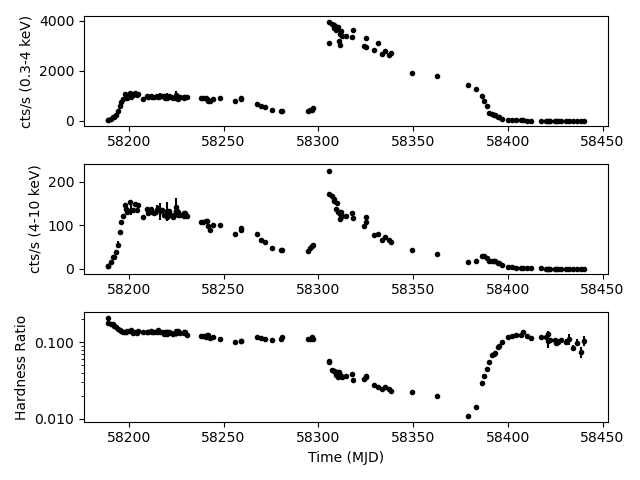

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_hd(t_mjd,t_mjd_err,cts_per_s_soft,cts_per_s_soft_err,cts_per_s_hard,cts_per_s_hard_err,ratio,ratio_err,soft_range,hard_range):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    ax1.errorbar(t_mjd,cts_per_s_soft, xerr=t_mjd_err, yerr=cts_per_s_soft_err, fmt='k.')
    ax1.set_ylabel("cts/s ("+soft_range+" keV)")
    ax2.errorbar(t_mjd,cts_per_s_hard, xerr=t_mjd_err, yerr=cts_per_s_hard_err, fmt='k.')
    ax2.set_ylabel("cts/s ("+hard_range+" keV)")
    ax3.errorbar(t_mjd,ratio, xerr=t_mjd_err, yerr=ratio_err, fmt='k.')
    ax3.set_ylabel("Hardness Ratio")
    ax3.set_xlabel("Time (MJD)")

    #ax3.set_ylim(0.001,10)
    ax3.set_yscale('log')

    plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.ticklabel_format(style='plain',useOffset=False,axis='y')
    plt.tight_layout()
    plt.show()

t_mjd = []
t_mjd_positive_err = []
t_mjd_negative_err = []
t_mjd_test = []
t_mjd_test_positive_err = []
t_mjd_test_negative_err = []
cts_per_s_soft = []
cts_per_s_soft_err = []
cts_per_s_hard = []
cts_per_s_hard_err = []
ratio = []
ratio_err = []
# obsid = []

flag_row='None'

ss = f.readline()
while ss != '':

    text_row=False
    row = ss.split('\t')
    if len(row) == 1:
        row = ss.split(' ')

    if 'soft' in row and 'band' in row:
        soft_range = row[6]

    if 'hard' in row and 'band' in row:
        hard_range = row[6]

    if 'soft' in row and 'data\n' in row:
        text_row=True
        flag_row='soft'
        #print(row)
    elif 'hard' in row and 'data\n' in row:
        text_row=True
        flag_row='hard'
    elif 'ratio' in row and 'data\n' in row:
        text_row=True
        flag_row='ratio'

    if row[0] != 'NO' and row[0] != '!' and row[0] != 'READ' and row[0] != '!MJD' and flag_row == 'soft' and text_row == False:
        t_mjd.append(float(row[0]))
        t_mjd_positive_err.append(float(row[1]))
        t_mjd_negative_err.append(-float(row[2]))
        cts_per_s_soft.append(float(row[3]))
        cts_per_s_soft_err.append(float(row[4]))
        # obsid.append(row[5].split('=')[1].split('\n')[0])

    if row[0] != 'NO' and row[0] != '!' and row[0] != 'READ' and row[0] != '!MJD' and flag_row == 'hard' and text_row == False:
        cts_per_s_hard.append(float(row[3]))
        cts_per_s_hard_err.append(float(row[4]))

    if row[0] != 'NO' and row[0] != '!' and row[0] != 'READ' and row[0] != '!MJD' and flag_row == 'ratio' and text_row == False:
        ratio.append(float(row[3]))
        ratio_err.append(float(row[4]))
        
    ss = f.readline()


t_mjd = np.array(t_mjd)
t_mjd_err = np.array([t_mjd_negative_err,t_mjd_positive_err])
cts_per_s_soft = np.array(cts_per_s_soft)
cts_per_s_soft_err = np.array(cts_per_s_soft_err)
cts_per_s_hard = np.array(cts_per_s_hard)
cts_per_s_hard_err = np.array(cts_per_s_hard_err)
ratio = np.array(ratio)
ratio_err = np.array(ratio_err)
# obsid = np.array(obsid)


#Only show between specific dates
if len(dates) > 0:
    print('Showing only observations between MJDs: ',dates[0],' and ',dates[1])
    t_mjd_index , = np.where((t_mjd >= int(dates[0])) & (t_mjd <= int(dates[1])))
    t_mjd = np.take(t_mjd,t_mjd_index)
    t_mjd_err = np.take(t_mjd_err,t_mjd_index,axis=1)
    cts_per_s_soft = np.take(cts_per_s_soft,t_mjd_index)
    cts_per_s_soft_err = np.take(cts_per_s_soft_err,t_mjd_index)
    cts_per_s_hard = np.take(cts_per_s_hard,t_mjd_index)
    cts_per_s_hard_err = np.take(cts_per_s_hard_err,t_mjd_index)
    ratio = np.take(ratio,t_mjd_index)
    ratio_err = np.take(ratio_err,t_mjd_index)

# Create a mask for rows where the ratio is not negative
mask = ratio >= 0

t_mjd = t_mjd[mask]
t_mjd_err = t_mjd_err[:,mask]
ratio = ratio[mask]
ratio_err = ratio_err[mask]
cts_per_s_soft = cts_per_s_soft[mask]
cts_per_s_soft_err = cts_per_s_soft_err[mask]
cts_per_s_hard = cts_per_s_hard[mask]
cts_per_s_hard_err = cts_per_s_hard_err[mask]

mask = ratio_err >= 0

t_mjd = t_mjd[mask]
t_mjd_err = t_mjd_err[:,mask]
ratio = ratio[mask]
ratio_err = ratio_err[mask]
cts_per_s_soft = cts_per_s_soft[mask]
cts_per_s_soft_err = cts_per_s_soft_err[mask]
cts_per_s_hard = cts_per_s_hard[mask]
cts_per_s_hard_err = cts_per_s_hard_err[mask]
    
#Plot
plot_hd(t_mjd,t_mjd_err,cts_per_s_soft,cts_per_s_soft_err,cts_per_s_hard,cts_per_s_hard_err,ratio,ratio_err,soft_range,hard_range)

total_count_rate = cts_per_s_soft + cts_per_s_hard

## Standardize data and perform PCA EVR analysis

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Combine into a single dataset
data = np.vstack((np.log(ratio), total_count_rate)).T

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

pca = PCA()
pca.fit_transform(data)
print(pca.explained_variance_ratio_)

[0.83633959 0.16366041]


## Perform k-mean clustering and plot clustered data

c:\Users\ysabd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ysabd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0.37435496 -0.90119776]
 [-1.47241188  1.88583213]
 [ 0.63475177 -0.14075581]
 [-2.17248868  0.05560336]]


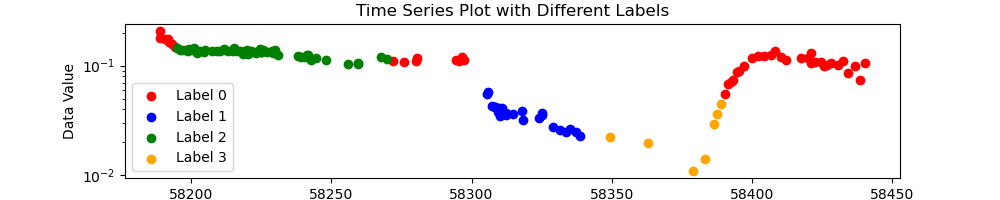

In [20]:
%matplotlib widget
# Use a clustering algorithm to cluster the encoded data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)  # Choose the appropriate number of clusters
clusters = kmeans.fit_predict(data)

# Print the cluster labels
print(clusters)

print(kmeans.cluster_centers_)

# Assign colors to each label
label_colors = ['red', 'blue', 'green', 'orange','purple','cyan','yellow']

# Create the plot
fig, ax = plt.subplots(figsize=(10,2))

# Iterate over the unique labels
for label in np.unique(clusters):
    mask = clusters == label
    ax.scatter(t_mjd[mask], ratio[mask], color=label_colors[label], label=f'Label {label}')

ax.set_xlabel('Time')
ax.set_ylabel('Data Value')
ax.set_title('Time Series Plot with Different Labels')
ax.set_yscale('log')
ax.legend()

plt.show()

### HID 

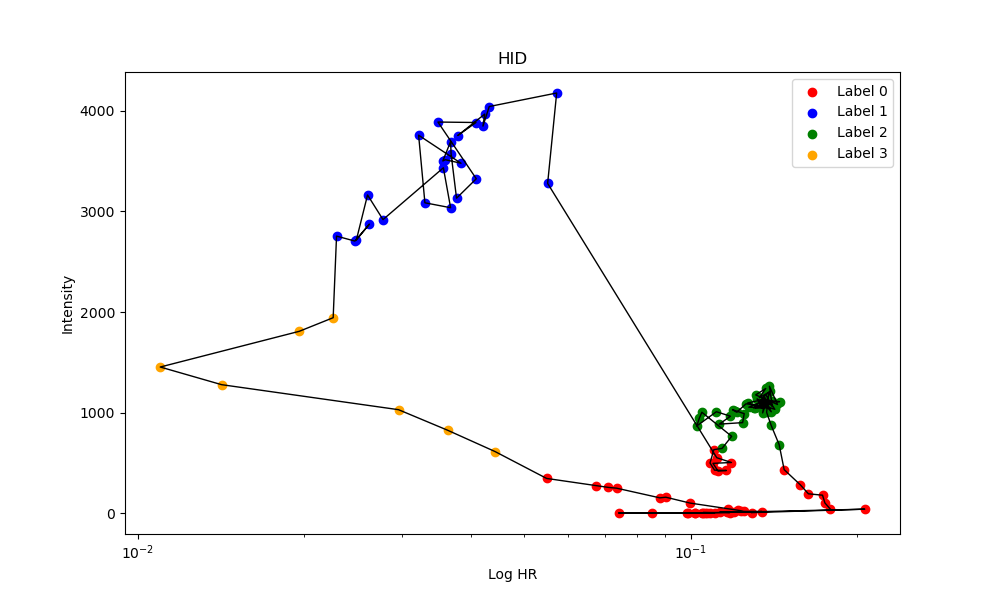

In [21]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the unique labels
for label in np.unique(clusters):
    mask = clusters == label
    ax.scatter(ratio[mask],total_count_rate[mask], color=label_colors[label], label=f'Label {label}')
plt.plot(ratio, total_count_rate,'k',linewidth=1)

ax.set_xlabel('Log HR')
ax.set_ylabel('Intensity')
ax.set_title('HID')
ax.set_xscale('log')
ax.legend()

plt.show()